# Lista de exercícios 07

## Things default for Regression and Classification

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from mylibs import transform
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.svm import SVC, SVR

### Datasets

In [2]:
from sklearn.datasets import load_boston, load_breast_cancer

# Regressão

## separando dados e label

In [3]:
#Separando os dados (X) do label (y)
X, y = load_boston(return_X_y=True)
#Aplicando K-fold para dividir os dados
kf = KFold(n_splits=5)

## Aplicando Standadization no dados

In [4]:
X_scale = preprocessing.StandardScaler().fit(X)
X = X_scale.transform(X)

## Gradient Descent

In [5]:
erros_mse_gradient = np.empty((1,0))
erros_mae_gradient = np.empty((1,0))
gd = lm.SGDRegressor()

for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gd.fit(X_train.astype(float),y_train.astype(float))
    ŷ = gd.predict(X_test)
    erros_mse_gradient = np.append(erros_mse_gradient, np.sqrt(metrics.mean_squared_error(y_test, ŷ)))
    erros_mae_gradient = np.append(erros_mae_gradient, metrics.mean_absolute_error(y_test, ŷ))
    
print('MSE: {}'.format(np.mean(erros_mse_gradient)))
print('MAE: {}'.format(np.mean(erros_mae_gradient)))

MSE: 6.211823552147303
MAE: 4.294326796161301


## Regressão Linear

In [6]:
erros_mse = np.empty((1,0))
erros_mae = np.empty((1,0))
modelo = lm.LinearRegression()

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]  
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    erros_mse = np.append(erros_mse, np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    erros_mae = np.append(erros_mae, metrics.mean_absolute_error(y_test, y_pred))

print('MSE: {}'.format(np.mean(erros_mse)))
print('MAE: {}'.format(np.mean(erros_mae)))

MSE: 5.836431226523881
MAE: 4.2565740468038875


## KNN

In [7]:
erros_mse_knn = np.empty((1,0))
erros_mae_knn = np.empty((1,0))
knn = neighbors.KNeighborsRegressor()

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
    knn.fit(X_test, y_test)
    ŷ = knn.predict(X_test)
    erros_mse_knn = np.append(erros_mse_knn, np.sqrt(metrics.mean_squared_error(y_test, ŷ)))
    erros_mae_knn = np.append(erros_mae_knn, metrics.mean_absolute_error(y_test, ŷ))
    
print('MSE: {}'.format(np.mean(erros_mse_knn)))
print('MAE: {}'.format(np.mean(erros_mae_knn)))

MSE: 3.4470181298523555
MAE: 2.2639320520287325


## Naive bayes

In [8]:
erros_mse_nb = np.empty((1,0))
erros_mae_nb = np.empty((1,0))
nb = naive_bayes.GaussianNB()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb.fit(X_test.astype(float), y_test.astype(int))
    ŷ = nb.predict(X_test.astype(float))
    erros_mse_nb = np.append(erros_mse_nb, np.sqrt(metrics.mean_squared_error(y_test, ŷ)))
    erros_mae_nb = np.append(erros_mae_nb, metrics.mean_absolute_error(y_test, ŷ))
    
print('MSE: {}'.format(np.mean(erros_mse_nb)))
print('MAE: {}'.format(np.mean(erros_mae_nb)))

MSE: 3.5665157178718125
MAE: 1.982743156668608


## SVM

In [9]:
erros_mse_svm = np.empty((1,0))
erros_mae_svm = np.empty((1,0))
svm = SVR()

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm.fit(X_train.astype(float), y_train.astype(int))
    ŷ = svm.predict(X_test.astype(float))
    erros_mse_svm = np.append(erros_mse_svm, np.sqrt(metrics.mean_squared_error(y_test, ŷ)))
    erros_mae_svm = np.append(erros_mae_svm, metrics.mean_absolute_error(y_test, ŷ))

print('MSE: {}'.format(np.mean(erros_mse_svm)))
print('MAE: {}'.format(np.mean(erros_mae_svm)))

MSE: 6.376170407574554
MAE: 4.258957501110469


# Melhor modelo -> KNN

In [10]:
best_knn = neighbors.KNeighborsRegressor()
best_knn.fit(X,y)
ŷ_best_knn = best_knn.predict(X)
print('MSE do melhor modelo (KNN): {}'.format(np.sqrt(metrics.mean_squared_error(y, ŷ_best_knn))))
print('MAE do melhor modelo (KNN): {}'.format(metrics.mean_absolute_error(y, ŷ_best_knn)))

MSE do melhor modelo (KNN): 3.3672833022994464
MAE do melhor modelo (KNN): 2.13


# Classificação

In [11]:
XC, yc = load_breast_cancer(return_X_y=True)
XC = preprocessing.normalize(XC)
kf2 = KFold(n_splits=5)

### Gerar curva roc

In [12]:
def gerar_curva_roc(y_test, X_test, algoritmo):
    fpr, tpr, _ = metrics.roc_curve(y_test, algoritmo.predict_proba(X_test)[:,1])
    roc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Logistic Regression

Matriz - split 0:
[[15 53]
 [ 0 46]]



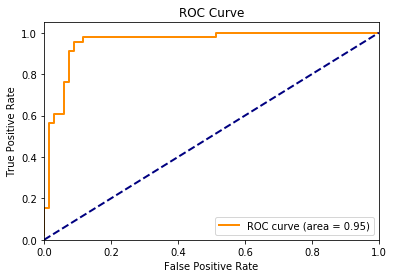

Matriz - split 1:
[[17 32]
 [ 0 65]]



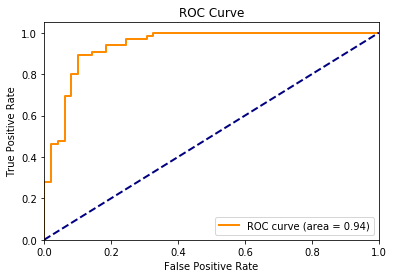

Matriz - split 2:
[[19 21]
 [ 0 74]]



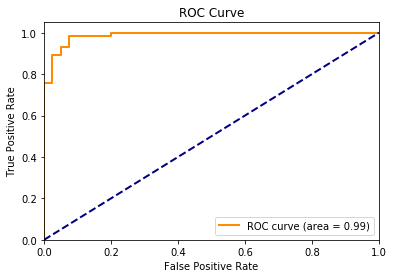

Matriz - split 3:
[[12 17]
 [ 0 85]]



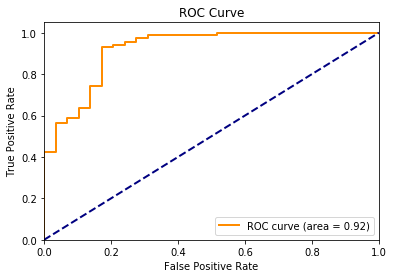

Matriz - split 4:
[[14 12]
 [ 0 87]]



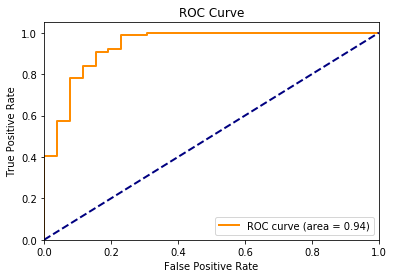


Accuracy: 0.7629715882626922
Precision: 0.725163627594447
Recall: 1.0
F1-score: 0.8314532638904447
AOC: 0.6994781652714137


In [13]:
# Metricas consideradas neste exercício
accuracy = np.empty((1,0))
precision = np.empty((1,0))
recall = np.empty((1,0))
f1_scr = np.empty((1,0))
aoc = np.empty((1,0))

# lr = LogisticRegression
lr = lm.LogisticRegression()

cont = 0

#Percorrendo as 5 splits de X
for train_index, test_index in kf2.split(XC):
    X_train, X_test = XC[train_index], XC[test_index]
    y_train, y_test = yc[train_index], yc[test_index]
    lr.fit(X_train, y_train)
    ŷ = lr.predict(X_test)
    accuracy = np.append(accuracy, metrics.accuracy_score(y_test, ŷ))
    precision = np.append(precision, metrics.precision_score(y_test, ŷ))
    recall = np.append(recall, metrics.recall_score(y_test, ŷ))
    f1_scr = np.append(f1_scr, metrics.f1_score(y_test, ŷ))
    aoc = np.append(aoc, metrics.roc_auc_score(y_test, ŷ))
    print('Matriz - split ' + str(cont) + ':')
    print(metrics.confusion_matrix(y_test, ŷ), end='\n\n')
    cont = cont+1
    
    gerar_curva_roc(y_test, X_test, lr)
    
print('\nAccuracy: {}'.format(np.mean(accuracy))),
print('Precision: {}'.format(np.mean(precision))),
print('Recall: {}'.format(np.mean(recall))),
print('F1-score: {}'.format(np.mean(f1_scr))),
print('AOC: {}'.format(np.mean(aoc)))

## KNN

Matriz - split 0:
[[54 14]
 [ 1 45]]



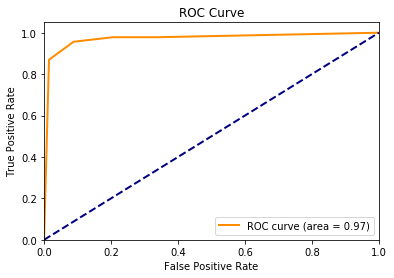

Matriz - split 1:
[[42  7]
 [ 6 59]]



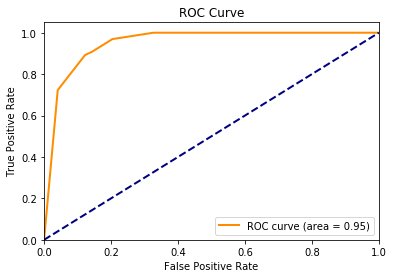

Matriz - split 2:
[[37  3]
 [ 0 74]]



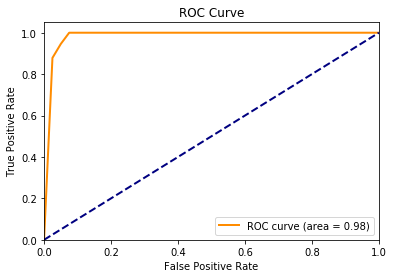

Matriz - split 3:
[[26  3]
 [ 2 83]]



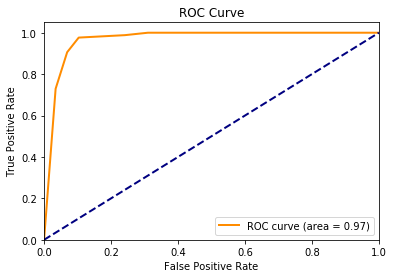

Matriz - split 4:
[[21  5]
 [ 9 78]]



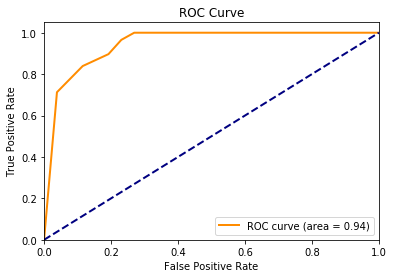


Accuracy: 0.912063344201211
Precision: 0.9045131069198961
Recall: 0.9517950979261499
F1-score: 0.9252891917988535
AOC: 0.903948002566267


In [14]:
# Metricas consideradas neste exercício
accuracy = np.empty((1,0))
precision = np.empty((1,0))
recall = np.empty((1,0))
f1_scr = np.empty((1,0))
aoc = np.empty((1,0))

# knn2 = KnnClassifier
knn2 = neighbors.KNeighborsClassifier()
cont = 0
#Percorrendo as 5 splits de X
for train_index, test_index in kf2.split(XC):
    X_train, X_test = XC[train_index], XC[test_index]
    y_train, y_test = yc[train_index], yc[test_index]
    knn2.fit(X_train, y_train)
    ŷ = knn2.predict(X_test)
    accuracy = np.append(accuracy, metrics.accuracy_score(y_test, ŷ))
    precision = np.append(precision, metrics.precision_score(y_test, ŷ))
    recall = np.append(recall, metrics.recall_score(y_test, ŷ))
    f1_scr = np.append(f1_scr, metrics.f1_score(y_test, ŷ))
    aoc = np.append(aoc, metrics.roc_auc_score(y_test, ŷ))
    print('Matriz - split ' + str(cont) + ':')
    print(metrics.confusion_matrix(y_test, ŷ), end='\n\n')
    cont = cont+1
    
    gerar_curva_roc(y_test, X_test, knn2)
    
print('\nAccuracy: {}'.format(np.mean(accuracy))),
print('Precision: {}'.format(np.mean(precision))),
print('Recall: {}'.format(np.mean(recall))),
print('F1-score: {}'.format(np.mean(f1_scr))),
print('AOC: {}'.format(np.mean(aoc)))

## Naive Bayes

Matriz - split 0:
[[60  8]
 [ 4 42]]



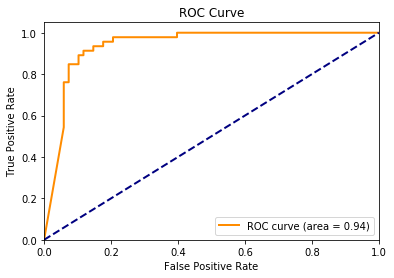

Matriz - split 1:
[[43  6]
 [17 48]]



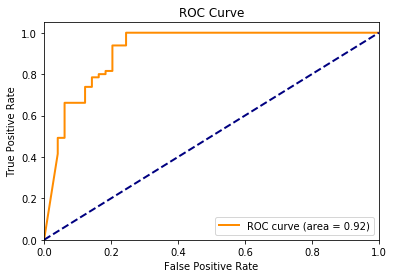

Matriz - split 2:
[[38  2]
 [16 58]]



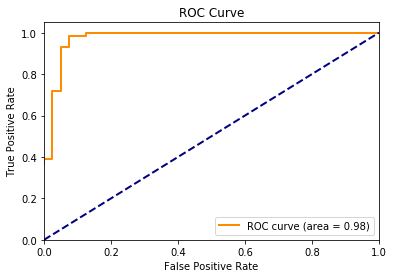

Matriz - split 3:
[[26  3]
 [25 60]]



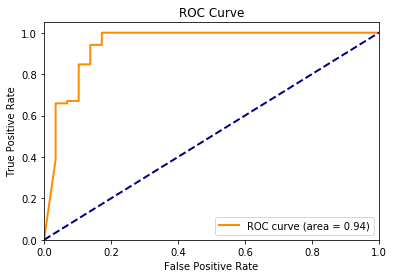

Matriz - split 4:
[[24  2]
 [24 63]]



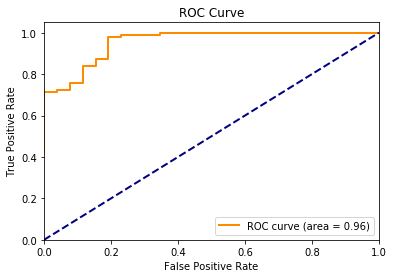


Accuracy: 0.8118770377270611
Precision: 0.9234334554334553
Recall: 0.7730618168963702
F1-score: 0.8374305020197077
AOC: 0.839484169328134


In [15]:
# Metricas consideradas neste exercício
accuracy = np.empty((1,0))
precision = np.empty((1,0))
recall = np.empty((1,0))
f1_scr = np.empty((1,0))
aoc = np.empty((1,0))

# nb2 = Naive Bayes
nb2 = naive_bayes.GaussianNB()

cont = 0

#Percorrendo as 5 splits de X
for train_index, test_index in kf2.split(XC):
    X_train, X_test = XC[train_index], XC[test_index]
    y_train, y_test = yc[train_index], yc[test_index]
    nb2.fit(X_train, y_train)
    ŷ = nb2.predict(X_test)
    accuracy = np.append(accuracy, metrics.accuracy_score(y_test, ŷ))
    precision = np.append(precision, metrics.precision_score(y_test, ŷ))
    recall = np.append(recall, metrics.recall_score(y_test, ŷ))
    f1_scr = np.append(f1_scr, metrics.f1_score(y_test, ŷ))
    aoc = np.append(aoc, metrics.roc_auc_score(y_test, ŷ))
    print('Matriz - split ' + str(cont) + ':')
    print(metrics.confusion_matrix(y_test, ŷ), end='\n\n')
    cont = cont+1
    
    gerar_curva_roc(y_test, X_test, nb2)
    
print('\nAccuracy: {}'.format(np.mean(accuracy))),
print('Precision: {}'.format(np.mean(precision))),
print('Recall: {}'.format(np.mean(recall))),
print('F1-score: {}'.format(np.mean(f1_scr))),
print('AOC: {}'.format(np.mean(aoc)))

## SVM

Matriz - split 0:
[[ 0 68]
 [ 0 46]]



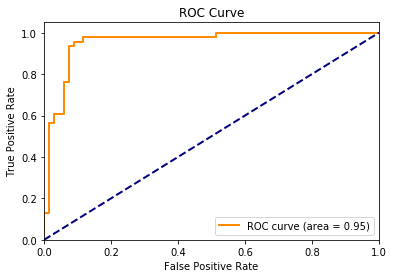

Matriz - split 1:
[[ 0 49]
 [ 0 65]]



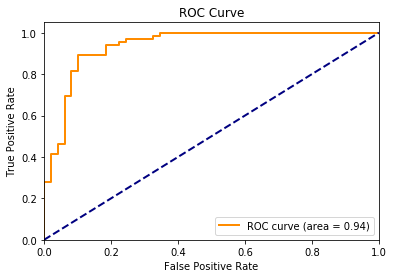

Matriz - split 2:
[[ 0 40]
 [ 0 74]]



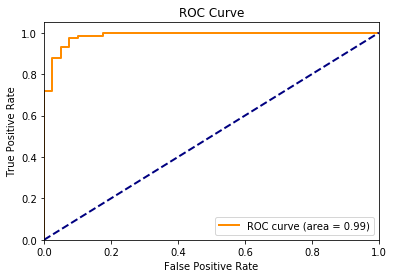

Matriz - split 3:
[[ 0 29]
 [ 0 85]]



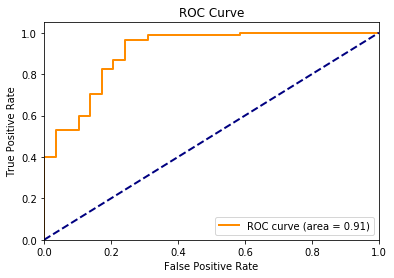

Matriz - split 4:
[[ 0 26]
 [ 0 87]]



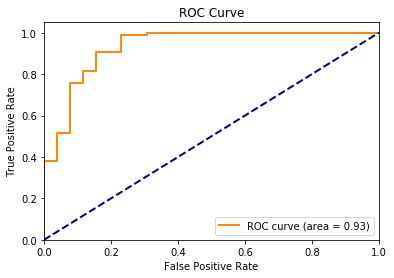


Accuracy: 0.6276665114112715
Precision: 0.6276665114112715
Recall: 1.0
F1-score: 0.7625524765154669
AOC: 0.5


In [16]:
# Metricas consideradas neste exercício
accuracy = np.empty((1,0))
precision = np.empty((1,0))
recall = np.empty((1,0))
f1_scr = np.empty((1,0))
aoc = np.empty((1,0))

# svm2 = SVM - Classificator
svm2 = SVC(probability=True)

cont = 0

#Percorrendo as 5 splits de X
for train_index, test_index in kf2.split(XC):
    X_train, X_test = XC[train_index], XC[test_index]
    y_train, y_test = yc[train_index], yc[test_index]
    svm2.fit(X_train.astype(float), y_train.astype(int))
    ŷ = svm2.predict(X_test)
    accuracy = np.append(accuracy, metrics.accuracy_score(y_test, ŷ))
    precision = np.append(precision, metrics.precision_score(y_test, ŷ))
    recall = np.append(recall, metrics.recall_score(y_test, ŷ))
    f1_scr = np.append(f1_scr, metrics.f1_score(y_test, ŷ))
    aoc = np.append(aoc, metrics.roc_auc_score(y_test, ŷ))
    print('Matriz - split ' + str(cont) + ':')
    print(metrics.confusion_matrix(y_test, ŷ), end='\n\n')
    cont = cont+1
    
    gerar_curva_roc(y_test, X_test, svm2)
    
print('\nAccuracy: {}'.format(np.mean(accuracy))),
print('Precision: {}'.format(np.mean(precision))),
print('Recall: {}'.format(np.mean(recall))),
print('F1-score: {}'.format(np.mean(f1_scr))),
print('AOC: {}'.format(np.mean(aoc)))

# Melhor modelo: KNN

Matriz confusion:
[[189  23]
 [ 10 347]]



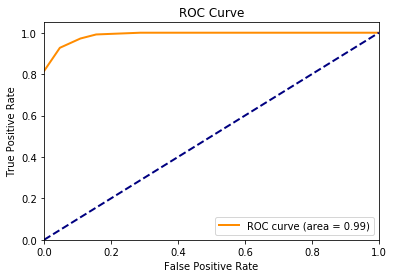

Accuracy: 0.9420035149384886
Precision: 0.9378378378378378
Recall: 0.9719887955182073
F1-score: 0.9546079779917468
Curve AOC: 0.9317491147402358


In [17]:
best_classificator = neighbors.KNeighborsClassifier()
best_classificator.fit(XC, yc)
ŷ_best_classificator = best_classificator.predict(XC)

print('Matriz confusion:')
print(metrics.confusion_matrix(yc, ŷ_best_classificator), end='\n\n')

gerar_curva_roc(yc, XC, best_classificator)

print('Accuracy: {}'.format(metrics.accuracy_score(yc, ŷ_best_classificator)))
print('Precision: {}'.format(metrics.precision_score(yc, ŷ_best_classificator)))
print('Recall: {}'.format(metrics.recall_score(yc, ŷ_best_classificator)))
print('F1-score: {}'.format(metrics.f1_score(yc, ŷ_best_classificator)))
print('Curve AOC: {}'.format(metrics.roc_auc_score(yc, ŷ_best_classificator)))